In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                dcc.Dropdown(id='site-dropdown',
                                            options=[
                                                {'label': 'All Sites', 'value': 'ALL'},
                                                {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                                {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                                {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                                {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
                                            ],
                                            value='ALL',
                                            placeholder="Select a Launch Site here",
                                            searchable=True
                                            ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)
                                dcc.RangeSlider(id='payload-slider',
                                                min=0,max=10000,step=1000,
                                                value=[min_payload,max_payload],
                                                marks={0: '0', 2500:'2500',5000:'5000',
                                                7500:'7500', 10000: '10000'}),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value'))

def build_graph(site_dropdown):
    if site_dropdown == 'ALL':
        piechart = px.pie(data_frame = spacex_df, names='Launch Site', values='class' ,title='Total Launches for All Sites')
        return piechart
    else:
        #specific_df = spacex_df['Launch Site']
        specific_df=spacex_df.loc[spacex_df['Launch Site'] == site_dropdown]
        piechart = px.pie(data_frame = specific_df, names='class',title='Total Launch for a Specific Site')
        return piechart

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value'),
    Input(component_id='payload-slider', component_property='value')])

def update_graph(site_dropdown, payload_slider):
    if site_dropdown == 'ALL':
        filtered_data = spacex_df[(spacex_df['Payload Mass (kg)']>=payload_slider[0])
        &(spacex_df['Payload Mass (kg)']<=payload_slider[1])]
        scatterplot = px.scatter(data_frame=filtered_data, x="Payload Mass (kg)", y="class", 
        color="Booster Version Category")
        return scatterplot
    else:
        specific_df=spacex_df.loc[spacex_df['Launch Site'] == site_dropdown]
        filtered_data = specific_df[(specific_df['Payload Mass (kg)']>=payload_slider[0])
        &(spacex_df['Payload Mass (kg)']<=payload_slider[1])]
        scatterplot = px.scatter(data_frame=filtered_data, x="Payload Mass (kg)", y="class", 
        color="Booster Version Category")
        return scatterplot

# Run the app
if __name__ == '__main__':
    app.run_server()

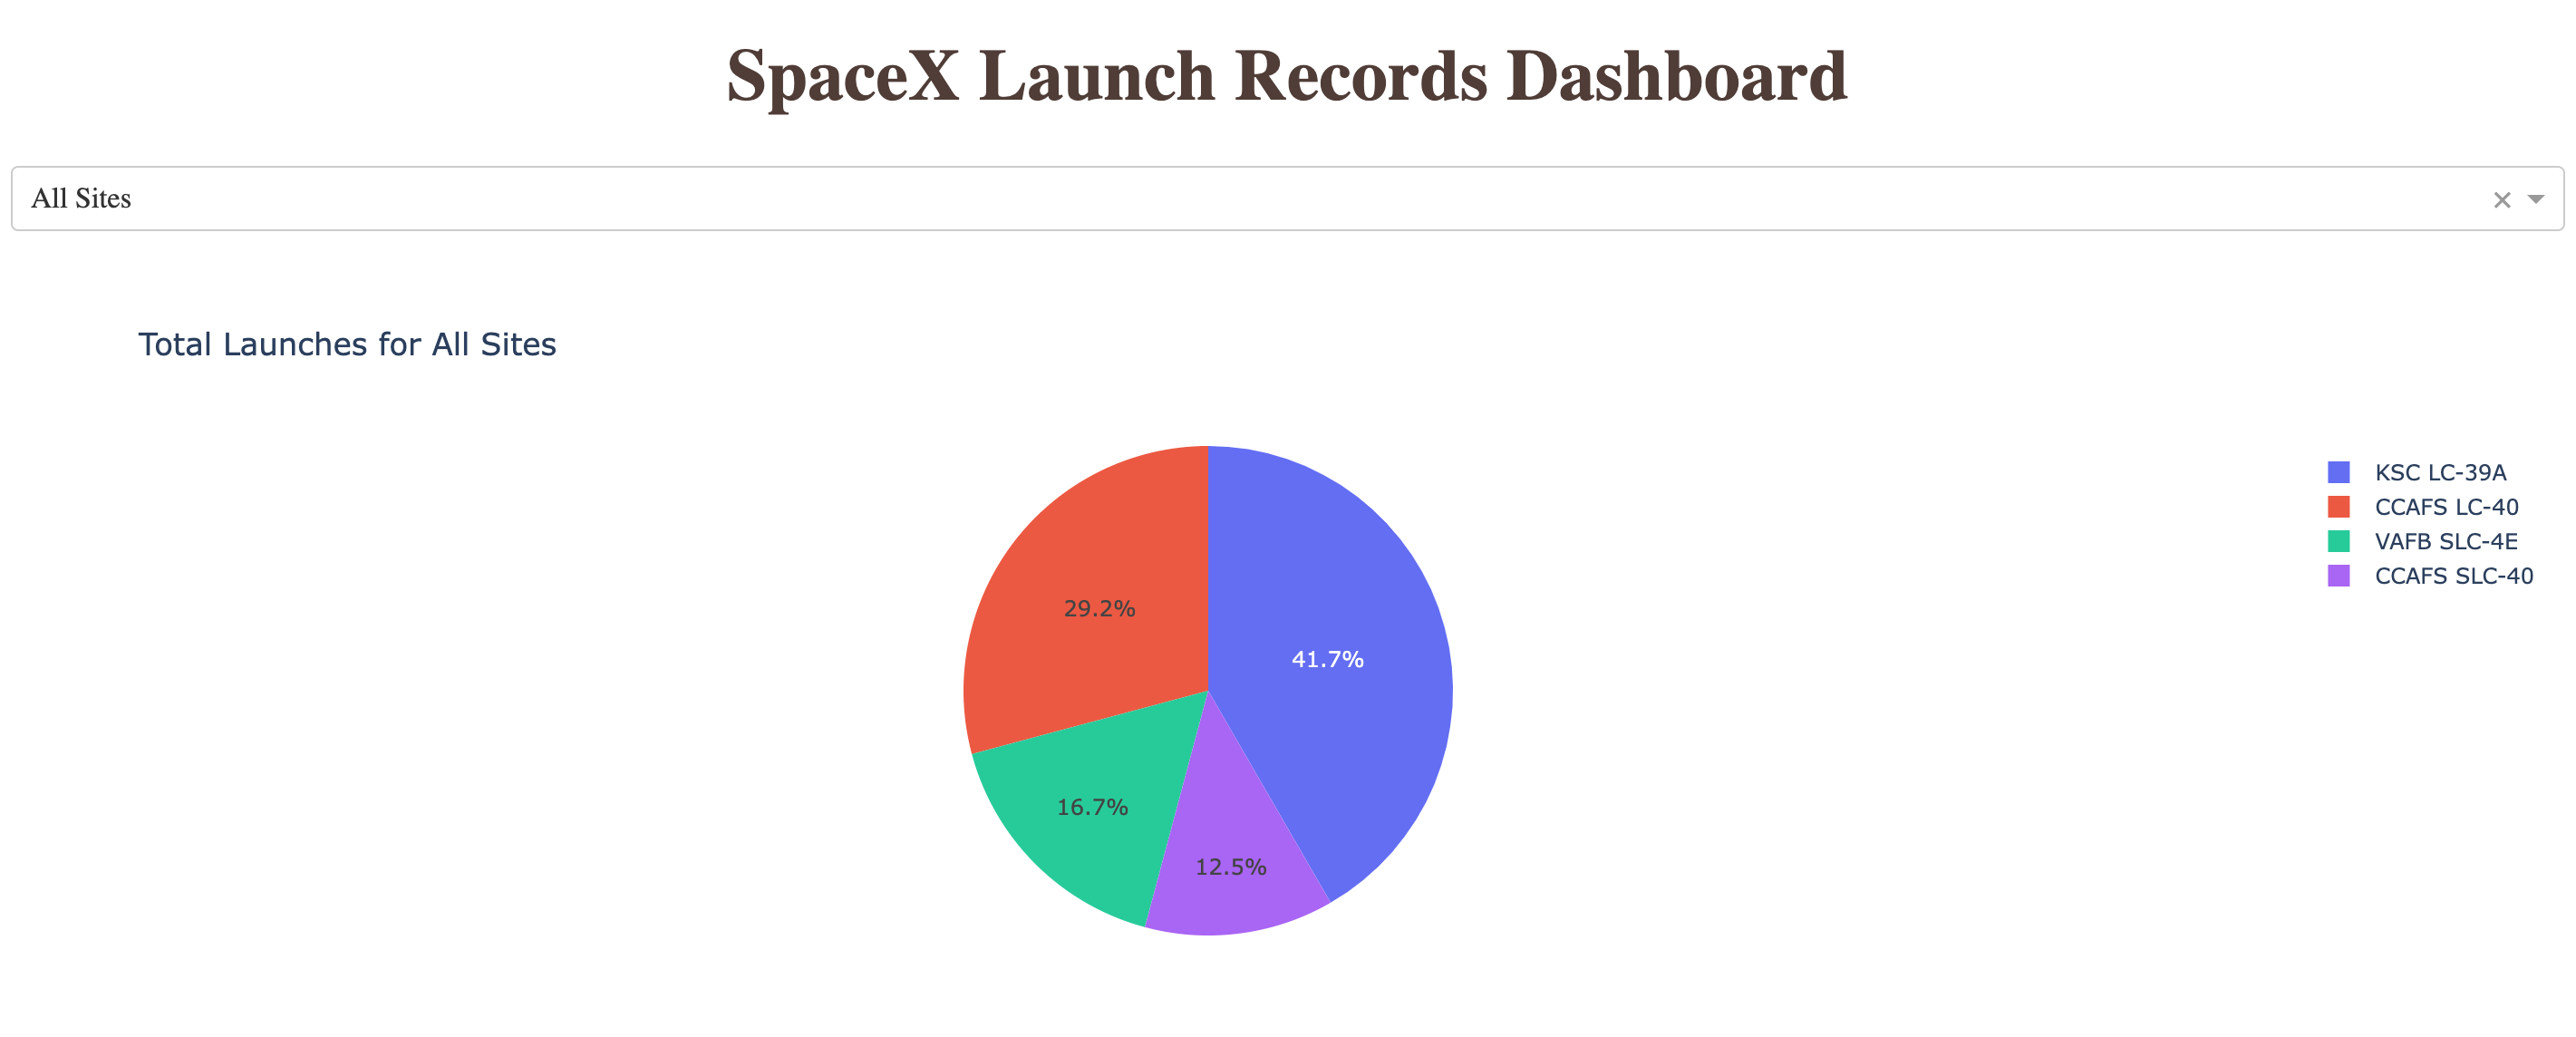

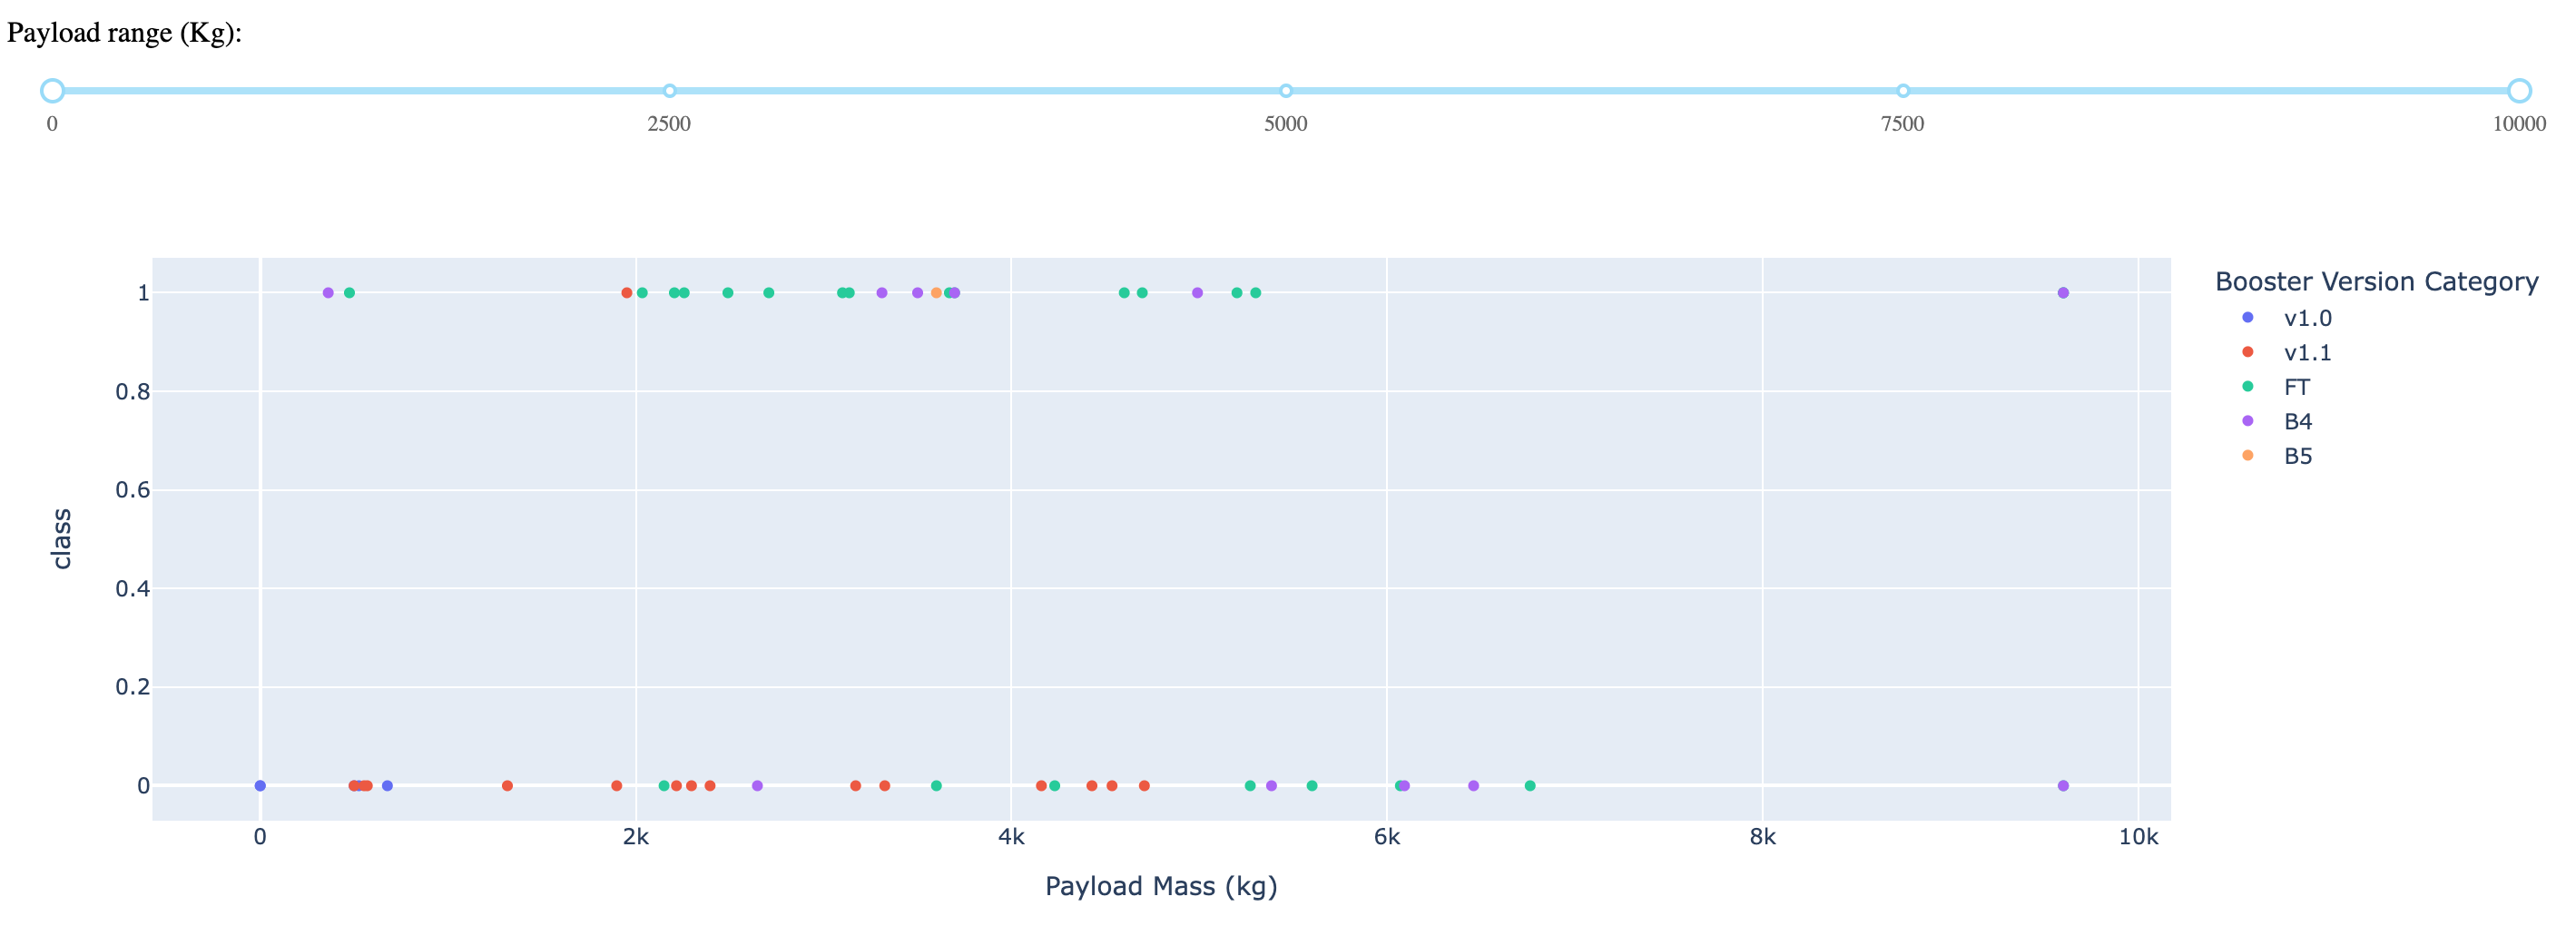